<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/60_40_Equities_and_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

18:33:06 Starting...
18:33:07 Installing yfinance into Google notebook...
18:33:13 Installing arch into Google notebook...
18:33:24 Initialized.


[*********************100%***********************]  2 of 2 completed
/tmp/ipython-input-746767571.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  data.index=pd.DatetimeIndex(data.index).to_period('B')


Price            Close                    High                     Low  \
Ticker             GLD         SPY         GLD         SPY         GLD   
Date                                                                     
2004-11-19   44.779999   79.277824   44.919998   80.155540   44.470001   
2004-11-22   44.950001   79.655922   44.970001   79.750445   44.740002   
2004-11-23   44.750000   79.777451   44.919998   79.844966   44.720001   
2004-11-24   45.049999   79.966499   45.049999   80.067770   44.790001   
2004-11-26   45.290001   79.905777   45.599998   80.331134   45.060001   
...                ...         ...         ...         ...         ...   
2026-01-30  444.950012  691.969971  470.059998  694.210022  430.799988   
2026-02-02  427.130005  695.409973  440.779999  696.929993  422.549988   
2026-02-03  454.290009  689.530029  459.000000  696.960022  448.309998   
2026-02-04  453.970001  686.190002  463.100006  691.450012  445.709991   
2026-02-05  441.880005  677.619995  450.899994  683.690002  440.350006   

Price                         Open                 Return            \
Ticker             SPY         GLD         SPY        GLD       SPY   
Date                                                                  
2004-11-19   79.088779   44.490002   80.142034   0.901302 -1.111685   
2004-11-22   79.014512   44.750000   79.109035   0.379638  0.476927   
2004-11-23   79.244070   44.880001   79.622160  -0.444941  0.152567   
2004-11-24   79.703186   44.930000   79.851717   0.670389  0.236970   
2004-11-26   79.872022   45.250000   80.013806   0.532745 -0.075935   
...                ...         ...         ...        ...       ...   
2026-01-30  687.119995  466.250000  691.789978 -10.274245 -0.298255   
2026-02-02  689.419983  434.010010  689.580017  -4.004946  0.497132   
2026-02-03  684.030029  452.630005  696.210022   6.358721 -0.845536   
2026-02-04  681.760010  462.470001  690.349976  -0.070441 -0.484392   
2026-02-05  675.789978  444.290009  680.940002  -2.663171 -1.248926   

Price           Volume            Weight         Return  Cumulative  \
Ticker             GLD        SPY    GLD  SPY Portfolio         SPY   
Date                                                                  
2004-11-19  11655300.0   54276500    0.4  0.6 -0.306491   -1.111685   
2004-11-22  11996000.0   37560200    0.4  0.6  0.438012   -0.640060   
2004-11-23   3169200.0   41968800    0.4  0.6 -0.086436   -0.488470   
2004-11-24   6105100.0   29724800    0.4  0.6  0.410338   -0.252657   
2004-11-26   3097700.0   15487700    0.4  0.6  0.167537   -0.328400   
...                ...        ...    ...  ...       ...         ...   
2026-01-30  86593500.0  101835100    0.4  0.6 -4.288651  763.138521   
2026-02-02  41626200.0   79286500    0.4  0.6 -1.303699  767.429457   
2026-02-03  28703500.0  107904600    0.4  0.6  2.036166  760.095025   
2026-02-04  24427900.0  105204600    0.4  0.6 -0.318812  755.928796   
2026-02-05  17718100.0  113140100    0.4  0.6 -1.814624  745.238876   

Price                               
Ticker             GLD   Portfolio  
Date                                
2004-11-19    0.901302   -0.306491  
2004-11-22    1.284362    0.130179  
2004-11-23    0.833706    0.043630  
2004-11-24    1.509685    0.454147  
2004-11-26    2.050473    0.622445  
...                ...         ...  
2026-01-30  902.591261  978.952057  
2026-02-02  862.438023  964.885767  
2026-02-03  923.636768  986.568614  
2026-02-04  922.915706  983.104507  
2026-02-05  895.673714  963.450232  

[5336 rows x 18 columns]

20:02:42 Mean-Variance Optimal Fully Invested Portfolio is 44:56.


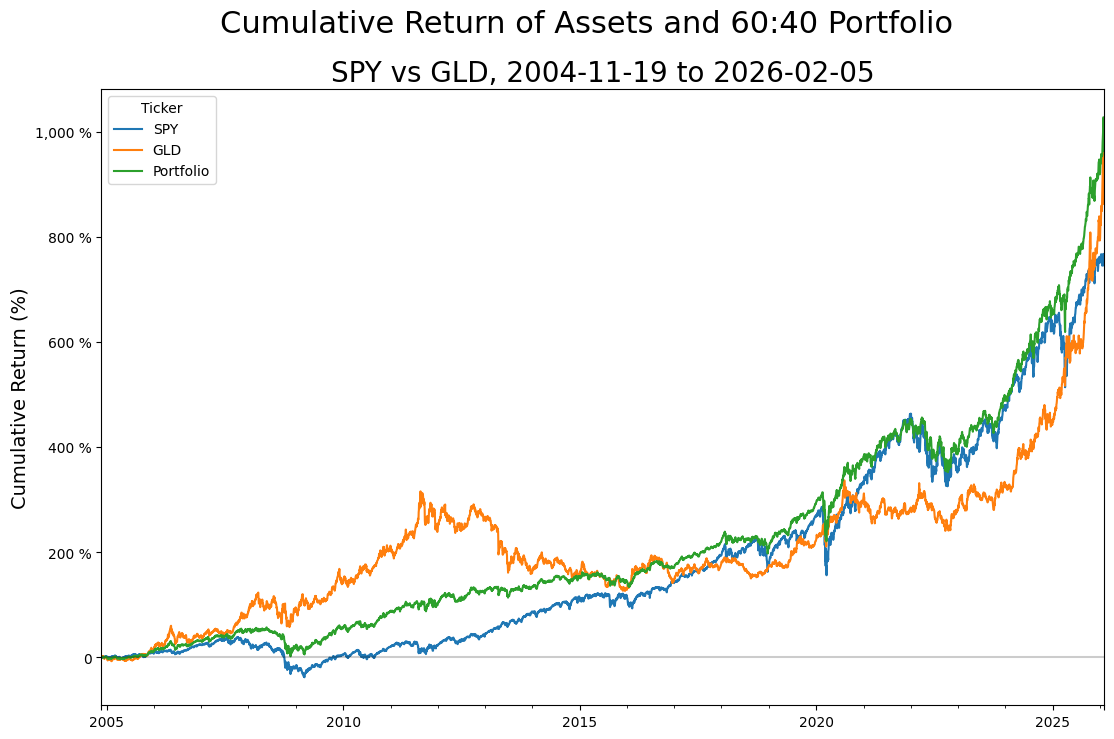

In [23]:
data=download(tickers:=[market:='SPY',alternative:='GLD'],"1990-01-01",today("%Y-%m-%d"),auto_adjust=True)
data.index=pd.DatetimeIndex(data.index).to_period('B')
#data=data.resample('M').last()

for ticker in tickers:
    data[('Return',ticker)]=data[('Close',ticker)].pct_change()*hundred
    data[('Weight',ticker)]=0.6 if ticker==market else 0.4

data.dropna(inplace=True)
data.sort_index(axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

for ticker in tickers+['Portfolio']:
    data[('Cumulative',ticker)]=(data[('Return',ticker)]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and 60:40 Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

display(data)

s1,s12,s12,s2=data['Return'][tickers].cov().to_numpy().reshape(4)
w1=(s2**2-s12)/(s1**2+s2**2-two*s12)
w2=one-w1
nprint("Mean-Variance Optimal Fully Invested Portfolio is %.0f:%0.f." % (w1*hundred,w2*hundred))

In [24]:
from warnings import filterwarnings ; filterwarnings('ignore',category=pd.errors.PerformanceWarning)

report=pd.DataFrame({'Weight':np.arange(zero,one+(delta:=0.025),delta)}).set_index("Weight")

if data.index.dtype==pd.PeriodDtype('W'):
    annualize=52e0

elif data.index.dtype==pd.PeriodDtype('M'):
    annualize=12e0

elif data.index.dtype==pd.PeriodDtype('Q'):
    annualize=4e0

elif data.index.dtype==pd.PeriodDtype('Y'):
    annualize=1e0

else:
    annualize=252e0

for weight in tqdm(report.index):
    report.loc[weight,market]=weight
    report.loc[weight,alternative]=one-weight

    for ticker in tickers:
        data[('Weight',ticker)]=report.loc[weight,ticker]

    data.drop(('Return','Portfolio'),axis=1,inplace=True)
    data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)

    report.loc[weight,'Sample']=(r:=data[('Return','Portfolio')]).count()
    report.loc[weight,'Mean']=(m:=r.mean())
    report.loc[weight,'Std.Dev.']=(s:=r.std())
    report.loc[weight,'Std.Err.']=r.sem()
    report.loc[weight,'Kurtosis']=r.kurt()+three

report['Sharpe']=report['Mean']/report['Std.Dev.']*annualize**half
report['Sharpe S.E.']=((annualize/report['Sample'])*(one+(report['Kurtosis']-one)/four*report['Sharpe']**two))**half
report['Annualized']=hundred*(one+report['Mean']/hundred)**annualize-hundred

display(report)

  0%|          | 0/41 [00:00<?, ?it/s]

,SPY,GLD,Sample,Mean,Std.Dev.,Std.Err.,Kurtosis,Sharpe,Sharpe S.E.,Annualized
Weight,,,,,,,,,,
0.000,0.000,1.000,5336.0,0.049462,1.128574,0.015450,9.994526,0.695736,0.314054,13.271138
0.025,0.025,0.975,5336.0,0.049405,1.102365,0.015091,9.978928,0.711449,0.317623,13.254726
0.050,0.050,0.950,5336.0,0.049347,1.077003,0.014744,9.963963,0.727355,0.321274,13.238317
0.075,0.075,0.925,5336.0,0.049290,1.052550,0.014409,9.950483,0.743385,0.324999,13.221909
0.100,0.100,0.900,5336.0,0.049232,1.029070,0.014088,9.939691,0.759459,0.328791,13.205505
0.125,0.125,0.875,5336.0,0.049175,1.006632,0.013780,9.933208,0.775481,0.332646,13.189102
0.150,0.150,0.850,5336.0,0.049117,0.985306,0.013488,9.933157,0.791338,0.336561,13.172702
0.175,0.175,0.825,5336.0,0.049060,0.965167,0.013213,9.942224,0.806904,0.340539,13.156305
0.200,0.200,0.800,5336.0,0.049002,0.946290,0.012954,9.963703,0.822035,0.344588,13.139910


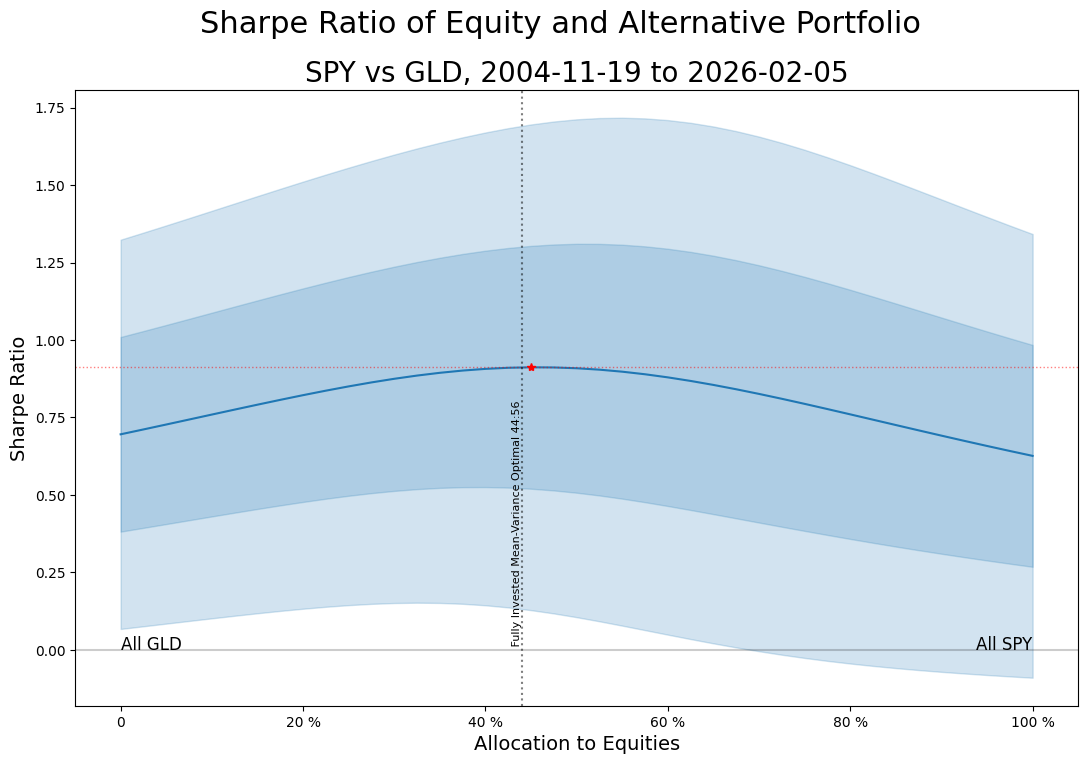

In [25]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index)*hundred,y:=report.loc[x,'Sharpe'])
plot.fill_between(x*hundred,y+(ye:=report.loc[x,'Sharpe S.E.']),y-ye,color='C0',alpha=0.2)
plot.fill_between(x*hundred,y+two*ye,y-two*ye,color='C0',alpha=0.2)
figure.suptitle(title:='Sharpe Ratio of Equity and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Equities',fontsize=14)
plot.set_ylabel('Sharpe Ratio',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[y.argmax()]*hundred,y.max(),'r*')
plot.axhline(y.max(),color='red',linestyle=':',linewidth=1,alpha=0.5)
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

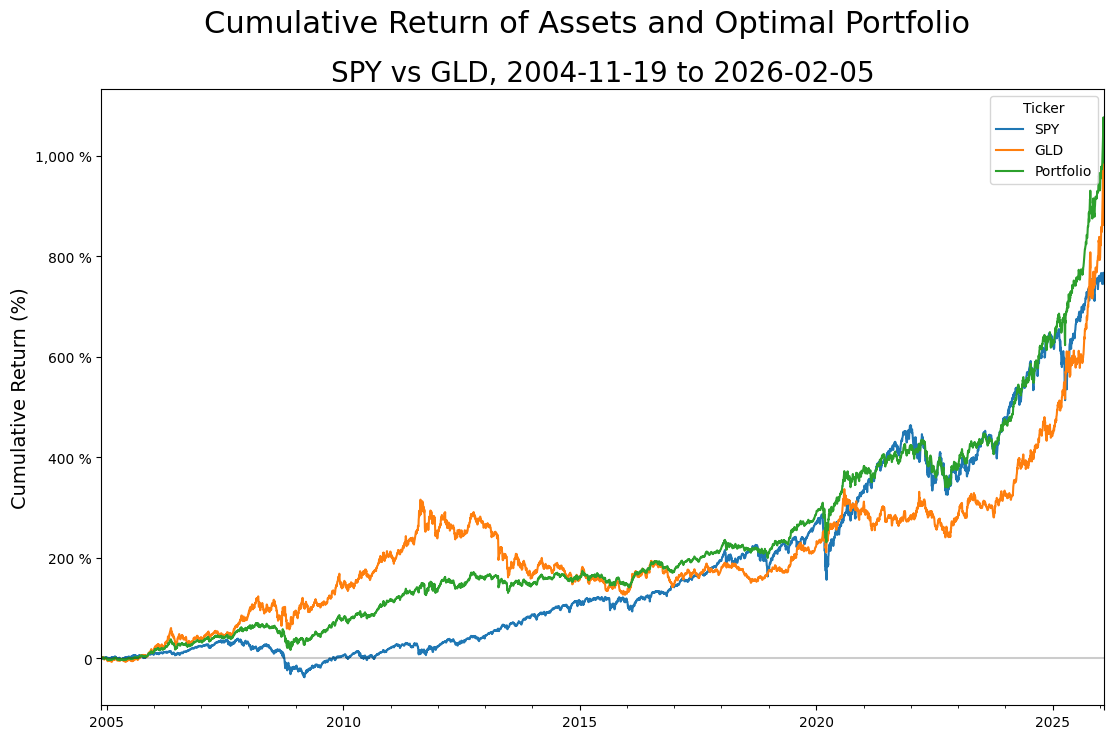

In [26]:
weight=x[y.argmax()]

for ticker in tickers:
    data[('Weight',ticker)]=report.loc[weight,ticker]

data.drop(('Return','Portfolio'),axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)
data[('Cumulative','Portfolio')]=(data[('Return','Portfolio')]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and Optimal Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

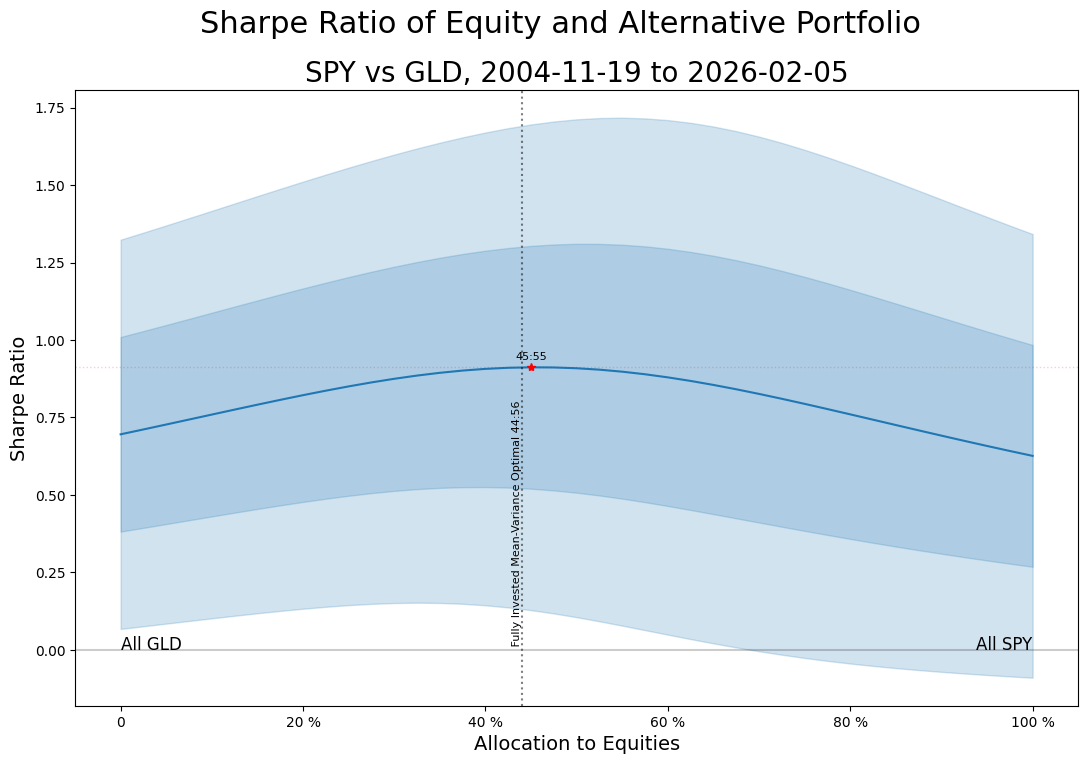

In [27]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Sharpe'].to_numpy())
plot.fill_between(x*hundred,y+(ye:=report.loc[x,'Sharpe S.E.']),y-ye,color='C0',alpha=0.2)
plot.fill_between(x*hundred,y+two*ye,y-two*ye,color='C0',alpha=0.2)
figure.suptitle(title:='Sharpe Ratio of Equity and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Equities',fontsize=14)
plot.set_ylabel('Sharpe Ratio',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[(omega:=y.argmax())]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.2)
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

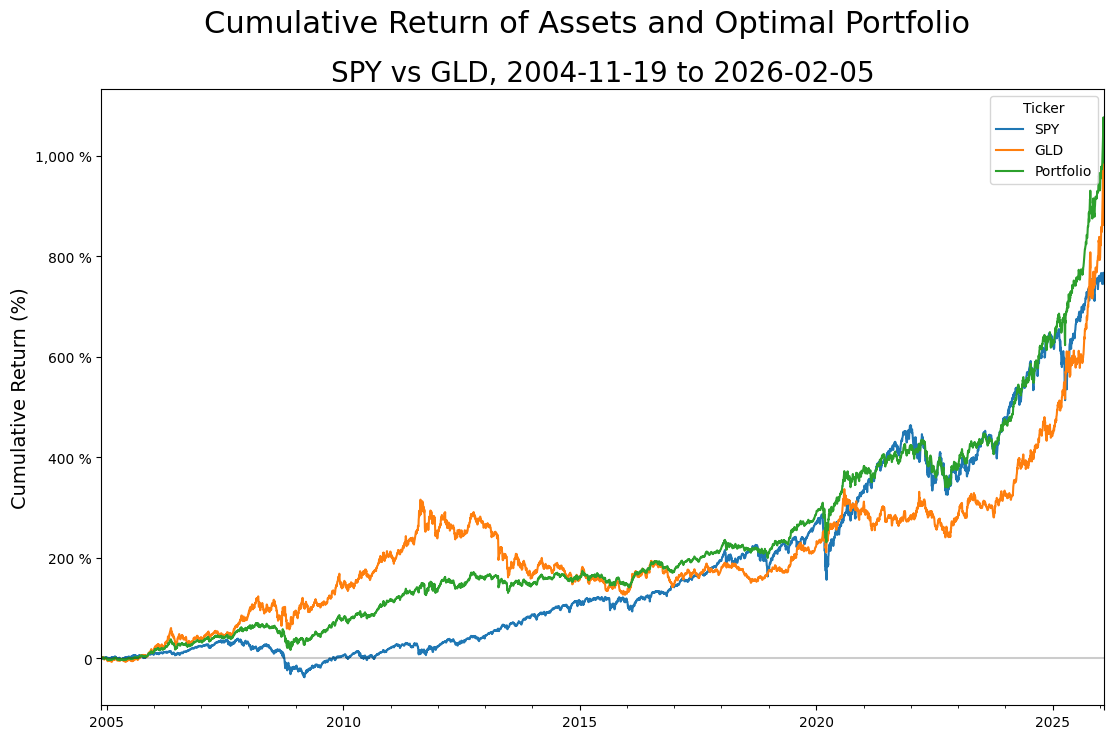

In [28]:
weight=x[omega]

for ticker in tickers:
    data[('Weight',ticker)]=report.loc[weight,ticker]

data.drop(('Return','Portfolio'),axis=1,inplace=True)
data[('Return','Portfolio')]=data.apply(lambda x:np.sum(x[('Weight',)]*x[('Return',)]),axis=1)
data[('Cumulative','Portfolio')]=(data[('Return','Portfolio')]/hundred+one).cumprod()*hundred-hundred

figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
data['Cumulative'].plot(ax=plot)
figure.suptitle(title:='Cumulative Return of Assets and Optimal Portfolio',fontsize=22)
plot.set_title(subtitle:="%s, %s to %s" % (" vs ".join(tickers),data.index[0],data.index[-1]),fontsize=20)
plot.set_xlabel(None)
plot.set_ylabel('Cumulative Return (%)',fontsize=14)
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

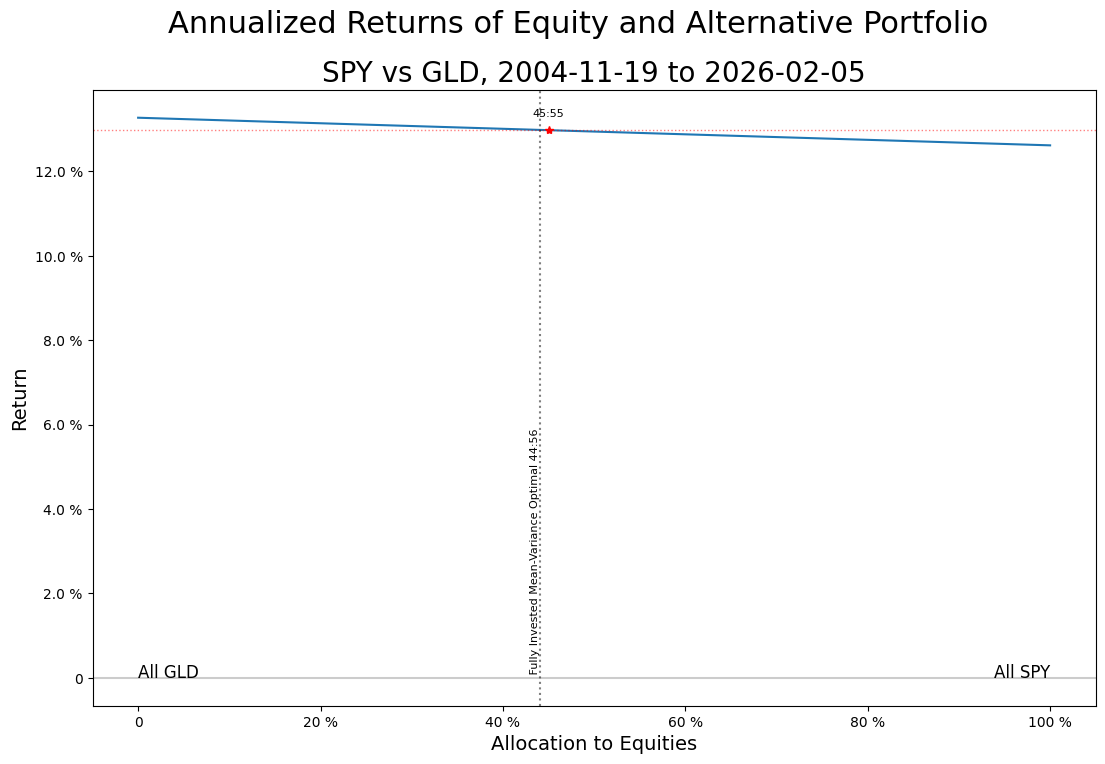

In [29]:
figure,plot=pl.subplots(figsize=(8*GoldenRatio,8))
plot.plot((x:=report.index.to_numpy())*hundred,y:=report.loc[x,'Annualized'].to_numpy())
figure.suptitle(title:='Annualized Returns of Equity and Alternative Portfolio',fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlabel('Allocation to Equities',fontsize=14)
plot.set_ylabel('Return',fontsize=14)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.text(zero,zero,"All "+alternative,fontsize=12,horizontalalignment='left')
plot.text(hundred,zero,"All "+market,fontsize=12,horizontalalignment='right')
plot.axhline(color='black',alpha=0.2)
plot.plot(x[omega]*hundred,y[omega],'r*')
plot.text(x[omega]*hundred,y[omega]*1.02,'%.0f:%.0f' % (x[omega]*hundred,hundred-x[omega]*hundred),fontsize=8,ha='center',va='bottom')
plot.axvline(w1*hundred,color='black',linestyle=':',alpha=0.5)
plot.text(w1*hundred,zero,' Fully Invested Mean-Variance Optimal %.0f:%0.f' % (w1*hundred,w2*hundred),rotation=90,ha='right',va='bottom',fontsize=8)
plot.axhline(y[omega],color='red',linestyle=':',linewidth=1,alpha=0.5)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')